In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU, ReLU
from tensorflow.keras.utils import to_categorical

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, array_to_img, img_to_array


from tensorflow.keras import losses, optimizers, regularizers

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.applications import MobileNet


In [54]:
## Skip this

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale=1./255,
                                   validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    directory='../P4/images/training',
    target_size=(100, 70),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    '../P4/images/training',
    target_size=(100, 70),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    subset='validation'  # Use 'subset' argument for validation set
)




Found 2153 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [55]:
# Define the data generator for image preprocessing
test_datagen = ImageDataGenerator(
    rescale=1./255) # convert to grayscale

# Define the generator that reads images from the directory
test_datagen = test_datagen.flow_from_directory(
    '../P4/images/testing',
    target_size=(100, 70), # resize to 224*224
    batch_size=32,
    class_mode='binary',
    shuffle=True,
)


Found 597 images belonging to 2 classes.


In [56]:
img_train, label_train = train_generator.next()

In [57]:
img_train[0].shape

(100, 70, 3)

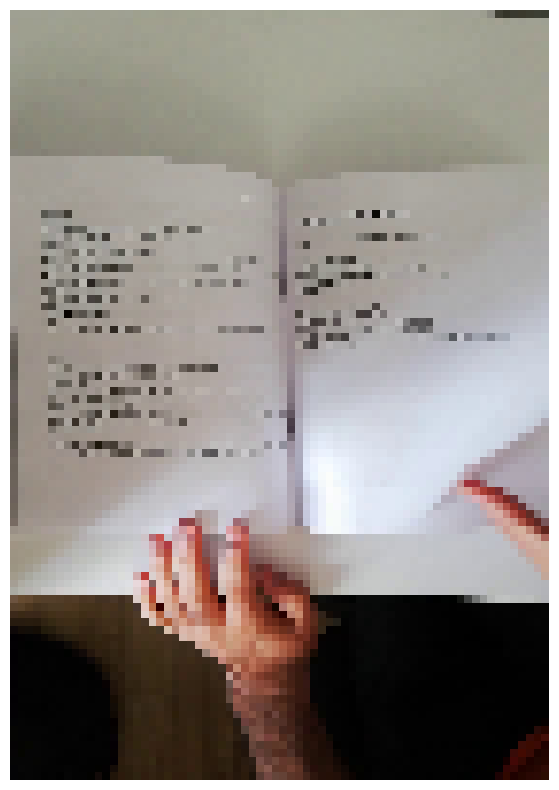

In [58]:
# visualizing the image
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.subplot(1,1,1)
plt.imshow(img_train[1], cmap="gray")
plt.axis('off')
plt.show()


In [59]:
# define model



model1 = Sequential() 
model1.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", kernel_regularizer=regularizers.l2(0.01), input_shape=(100, 70, 3)))
model1.add(ReLU())
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
model1.add(ReLU())
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())
model1.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
model1.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))

model1.add(ReLU())
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))
model1.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))

model1.add(ReLU())
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(filters=256, kernel_size=(3,3), padding='same'))
model1.add(Conv2D(filters=256, kernel_size=(3,3), padding='same'))

model1.add(ReLU())
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2,2)))



model1.add(Flatten())
model1.add(Dense(256))
model1.add(ReLU())
model1.add(Dropout(0.4))

model1.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(learning_rate=0.001)
model1.compile(loss=losses.binary_crossentropy, optimizer=adam, metrics=['accuracy'])

In [60]:
#Model summary
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 100, 70, 32)       896       
                                                                 
 re_lu_12 (ReLU)             (None, 100, 70, 32)       0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 50, 35, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 50, 35, 64)        18496     
                                                                 
 re_lu_13 (ReLU)             (None, 50, 35, 64)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 25, 17, 64)       0         
 g2D)                                                 

In [48]:
# Fit the model
history_model_1 = model1.fit(train_generator, validation_data=validation_generator, epochs=12, batch_size=32, verbose=1)


Epoch 1/12
68/68 [==============================] - 49s 677ms/step - loss: 0.4929 - accuracy: 0.8481 - val_loss: 0.6222 - val_accuracy: 0.6946
Epoch 2/12
68/68 [==============================] - 43s 625ms/step - loss: 0.2370 - accuracy: 0.9322 - val_loss: 0.3896 - val_accuracy: 0.8243
Epoch 3/12
68/68 [==============================] - 49s 720ms/step - loss: 0.1545 - accuracy: 0.9601 - val_loss: 1.9571 - val_accuracy: 0.5146
Epoch 4/12
68/68 [==============================] - 50s 738ms/step - loss: 0.1094 - accuracy: 0.9768 - val_loss: 0.9471 - val_accuracy: 0.7531
Epoch 5/12
68/68 [==============================] - 50s 733ms/step - loss: 0.1002 - accuracy: 0.9796 - val_loss: 2.2020 - val_accuracy: 0.5105
Epoch 6/12
68/68 [==============================] - 50s 734ms/step - loss: 0.0852 - accuracy: 0.9837 - val_loss: 2.9085 - val_accuracy: 0.4854
Epoch 7/12
68/68 [==============================] - 50s 734ms/step - loss: 0.0635 - accuracy: 0.9898 - val_loss: 1.9314 - val_accuracy: 0.7615

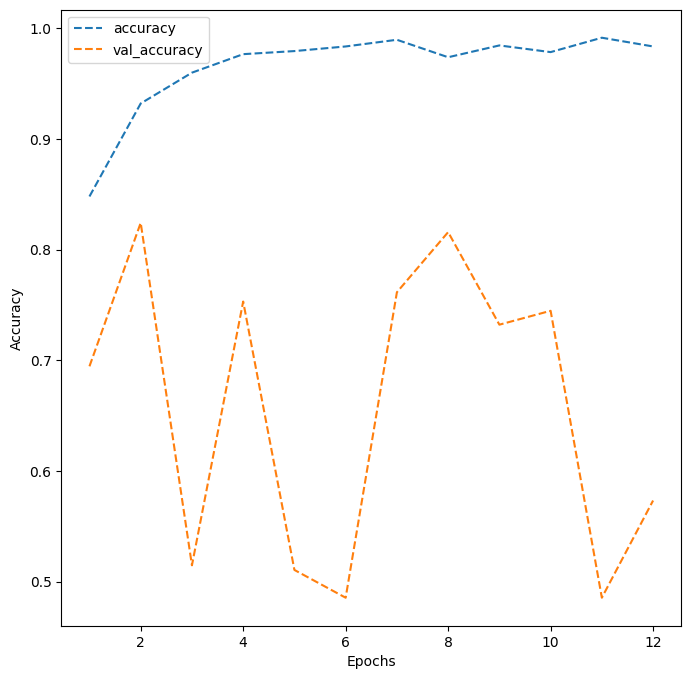

In [50]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,13)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [51]:
test_pred1 = model1.predict(test_datagen, steps=len(test_datagen), verbose=1)


# Choose a threshold of 0.5
threshold = 0.5

# Convert probabilities to predicted labels
test_pred_labels1 = np.where(test_pred1 >= threshold, 1, 0)
#test_pred_labels1

19/19 [==============================] - 9s 461ms/step


              precision    recall  f1-score   support

           0       0.51      0.99      0.68       307
           1       0.40      0.01      0.01       290

    accuracy                           0.51       597
   macro avg       0.46      0.50      0.34       597
weighted avg       0.46      0.51      0.35       597



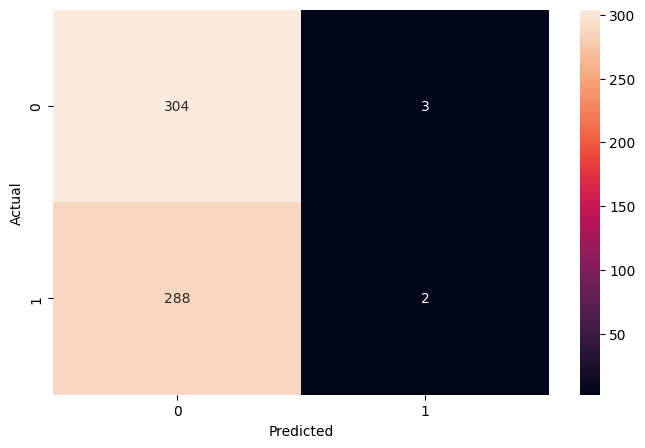

In [52]:

#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(test_datagen.classes, test_pred_labels1))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(test_datagen.classes, test_pred_labels1)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [21]:
tf.keras.backend.clear_session()

In [62]:
model2 = Sequential()
model2.add(Conv2D(32, (2, 2), activation = ReLU(), padding = 'same', input_shape=(100, 70,3)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation=ReLU()))
model2.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.001)

model2.compile(loss=losses.binary_crossentropy, optimizer=adam, metrics=['accuracy'])

In [63]:
history_model2 = model2.fit(train_generator, validation_data=validation_generator, epochs=12, batch_size=64, verbose=1)


Epoch 1/12
68/68 [==============================] - 38s 544ms/step - loss: 1.0196 - accuracy: 0.5894 - val_loss: 0.7313 - val_accuracy: 0.5146
Epoch 2/12
68/68 [==============================] - 40s 583ms/step - loss: 0.5154 - accuracy: 0.7743 - val_loss: 0.8304 - val_accuracy: 0.4686
Epoch 3/12
68/68 [==============================] - 38s 557ms/step - loss: 0.3673 - accuracy: 0.8774 - val_loss: 0.9111 - val_accuracy: 0.4770
Epoch 4/12
68/68 [==============================] - 38s 554ms/step - loss: 0.2348 - accuracy: 0.9429 - val_loss: 0.8613 - val_accuracy: 0.5314
Epoch 5/12
68/68 [==============================] - 37s 547ms/step - loss: 0.1758 - accuracy: 0.9471 - val_loss: 0.8945 - val_accuracy: 0.5607
Epoch 6/12
68/68 [==============================] - 37s 542ms/step - loss: 0.1025 - accuracy: 0.9819 - val_loss: 0.9680 - val_accuracy: 0.5774
Epoch 7/12
68/68 [==============================] - 34s 495ms/step - loss: 0.0785 - accuracy: 0.9847 - val_loss: 1.0384 - val_accuracy: 0.5690

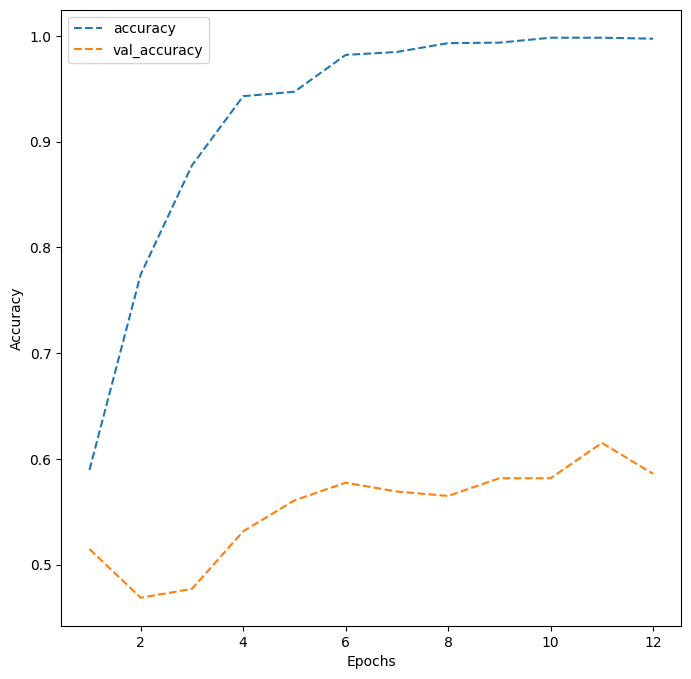

In [64]:
# plotting the accuracies

dict_hist = history_model2.history
list_ep = [i for i in range(1,13)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [65]:
tf.keras.backend.clear_session()

In [34]:
import cv2
import os

# Define the path to the edges folder
edges_folder = '../P4/images/edges'

# Create the edges folder if it does not exist
if not os.path.exists(edges_folder):
    os.makedirs(edges_folder)

# Loop over all images in the images folder
for filename in os.listdir('../P4/images/training/0'):
    if filename.endswith('.jpg'):
        # Read the image
        img = cv2.imread(os.path.join('../P4/images/training/0', filename))
        
        # Apply the edge detection
        edges = cv2.Canny(img,100,200)
        
        # Save the edge-detected image in the edges folder
        cv2.imwrite(os.path.join(edges_folder, filename), edges)


In [35]:
import cv2
import os

# Define the path to the edges folder
edges_folder = '../P4/images/edges1'

# Create the edges folder if it does not exist
if not os.path.exists(edges_folder):
    os.makedirs(edges_folder)

# Loop over all images in the images folder
for filename in os.listdir('../P4/images/training/1'):
    if filename.endswith('.jpg'):
        # Read the image
        img = cv2.imread(os.path.join('../P4/images/training/1', filename))
        
        # Apply the edge detection
        edges = cv2.Canny(img,100,200)
        
        # Save the edge-detected image in the edges folder
        cv2.imwrite(os.path.join(edges_folder, filename), edges)


In [49]:
train_datagen = ImageDataGenerator( rescale=1./255,
                                   validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    directory='../P4/images/training/edges',
    target_size=(1920, 1080),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    '../P4/images/training',
    target_size=(1920, 1080),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    subset='validation'  # Use 'subset' argument for validation set
)


Found 2153 images belonging to 2 classes.
Found 478 images belonging to 3 classes.


In [50]:
im_edg, lab_edg = train_generator.next()

In [51]:
im_edg.shape

(32, 1920, 1080, 3)

In [52]:
lab_edg

array([0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.],
      dtype=float32)

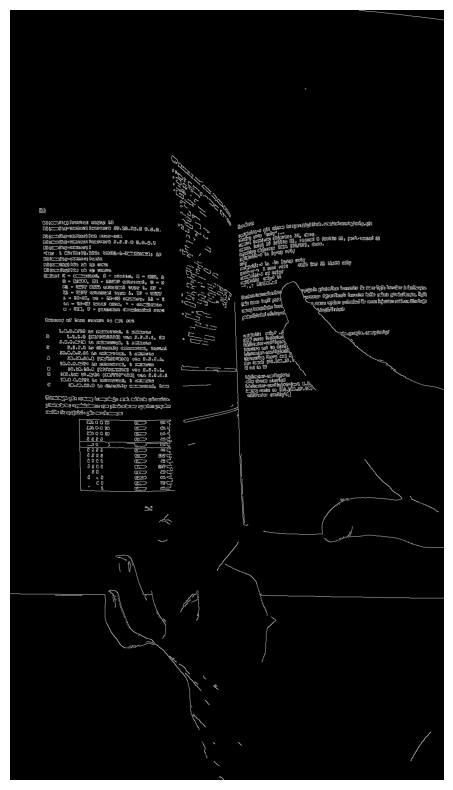

In [53]:
# visualizing the image
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.subplot(1,1,1)
plt.imshow(im_edg[-1], cmap="gray")
plt.axis('off')
plt.show()


In [8]:
# define model



model3 = Sequential() 
model3.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", kernel_regularizer=regularizers.l2(0.01), input_shape=(1920, 1080, 3)))
model3.add(ReLU())
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
model3.add(ReLU())
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
model3.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))

model3.add(ReLU())
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))
model3.add(ReLU())
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))

model3.add(ReLU())
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(filters=256, kernel_size=(3,3), padding='same'))
model3.add(ReLU())
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(filters=256, kernel_size=(3,3), padding='same'))

model3.add(ReLU())
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))


model3.add(Flatten())
model3.add(Dense(128))
model3.add(ReLU())
model3.add(Dropout(0.4))

model3.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(learning_rate=0.001)
model3.compile(loss=losses.binary_crossentropy, optimizer=adam, metrics=['accuracy'])

In [9]:
#Model summary
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1920, 1080, 32)    896       
                                                                 
 re_lu (ReLU)                (None, 1920, 1080, 32)    0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 960, 540, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 960, 540, 64)      18496     
                                                                 
 re_lu_1 (ReLU)              (None, 960, 540, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 480, 270, 64)     0         
 2D)                                                    

In [10]:
# Fit the model
history_model_3 = model3.fit(train_generator, validation_data=validation_generator, epochs=12, batch_size=32, verbose=1)


Epoch 1/12


InvalidArgumentError: Graph execution error:

Detected at node 'sequential/flatten/Reshape' defined at (most recent call last):
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\IPython\core\interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\IPython\core\interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\IPython\core\interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\IPython\core\interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\abedq\AppData\Local\Temp\ipykernel_19304\2643279779.py", line 2, in <module>
      history_model_3 = model3.fit(train_generator, validation_data=validation_generator, epochs=12, batch_size=32, verbose=1)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\keras\engine\training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\keras\engine\sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\abedq\anaconda3\envs\deepnn\lib\site-packages\keras\layers\reshaping\flatten.py", line 104, in call
      return tf.reshape(inputs, flattened_shape)
Node: 'sequential/flatten/Reshape'
Input to reshape is a tensor with 131072 values, but the requested shape requires a multiple of 30720
	 [[{{node sequential/flatten/Reshape}}]] [Op:__inference_train_function_4273]

In [47]:
# Load pre-trained MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model2 = Sequential()
model2.add(base_model)
model2.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l2(0.1)))
model2.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))

model2.add(ReLU())
model2.add(BatchNormalization())

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l2(0.05)))
model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))

model2.add(ReLU())
model2.add(BatchNormalization())

model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l2(0.08)))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same'))

model2.add(ReLU())
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(BatchNormalization())

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))


model2.add(Dense(1, activation='sigmoid'))

# Freeze the layers in the pre-trained model
#for layer in base_model.layers:
#    layer.trainable = False

adam = optimizers.Adam(learning_rate=0.001)
model2.compile(loss=losses.binary_crossentropy, optimizer=adam, metrics=['accuracy'])


In [48]:
#Model summary
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 7, 7, 64)          589888    
                                                                 
 conv2d_38 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 re_lu_18 (ReLU)             (None, 7, 7, 64)          0         
                                                                 
 batch_normalization_18 (Bat  (None, 7, 7, 64)         256       
 chNormalization)                                                
                                                                 
 conv2d_39 (Conv2D)          (None, 7, 7, 128)        

In [49]:


# Fit the model
history_model_2 = model2.fit(train_generator, validation_data=validation_generator, epochs=8, batch_size=32, verbose=1)


Epoch 1/8
68/68 [==============================] - 238s 3s/step - loss: 15.3460 - accuracy: 0.9164 - val_loss: 4.5336 - val_accuracy: 0.7699
Epoch 2/8
68/68 [==============================] - 214s 3s/step - loss: 1.4229 - accuracy: 0.9814 - val_loss: 0.8077 - val_accuracy: 0.8201
Epoch 3/8
68/68 [==============================] - 219s 3s/step - loss: 0.2729 - accuracy: 0.9865 - val_loss: 0.2524 - val_accuracy: 0.9498
Epoch 4/8
68/68 [==============================] - 196s 3s/step - loss: 0.1832 - accuracy: 0.9824 - val_loss: 6.4030 - val_accuracy: 0.7866
Epoch 5/8
68/68 [==============================] - 210s 3s/step - loss: 0.1956 - accuracy: 0.9842 - val_loss: 10.0734 - val_accuracy: 0.6569
Epoch 6/8
68/68 [==============================] - 207s 3s/step - loss: 0.2277 - accuracy: 0.9786 - val_loss: 0.6008 - val_accuracy: 0.9665
Epoch 7/8
68/68 [==============================] - 199s 3s/step - loss: 0.5935 - accuracy: 0.9721 - val_loss: 1.1225 - val_accuracy: 0.9247
Epoch 8/8
68/68 [=

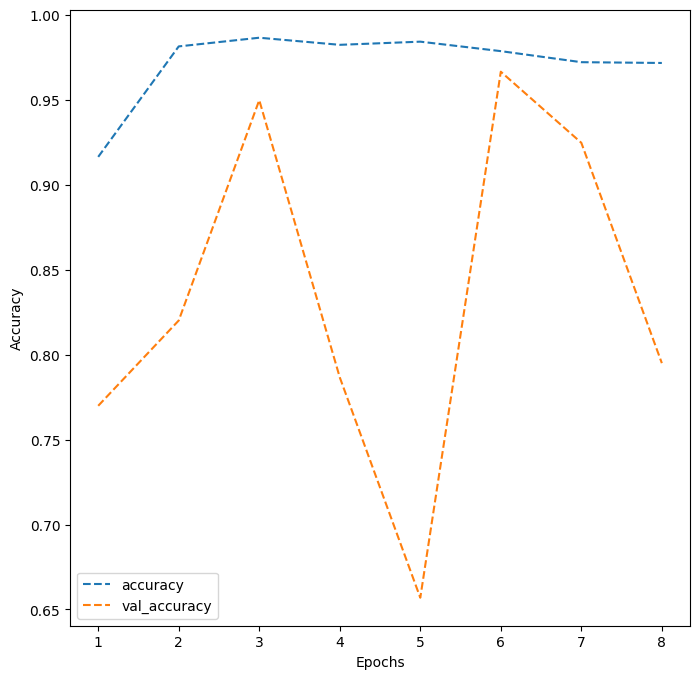

In [50]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,9)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
model2.save('model2_MobileNet_05.h5')

In [5]:
mode_t = load_model('model2_MobileNet_04.h5')

In [51]:
test_pred2 = model2.predict(test_datagen, steps=len(test_datagen), verbose=1)


# Choose a threshold of 0.5
threshold = 0.5

# Convert probabilities to predicted labels
test_pred_labels2 = np.where(test_pred2 >= threshold, 1, 0)
#test_pred_labels1

19/19 [==============================] - 15s 732ms/step


              precision    recall  f1-score   support

           0       0.49      0.61      0.54       307
           1       0.44      0.33      0.38       290

    accuracy                           0.47       597
   macro avg       0.47      0.47      0.46       597
weighted avg       0.47      0.47      0.46       597



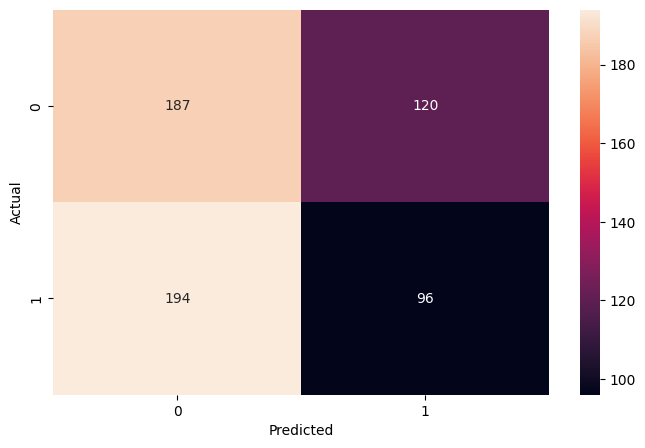

In [52]:

#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(test_datagen.classes, test_pred_labels2))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(test_datagen.classes, test_pred_labels2)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [26]:
tf.keras.backend.clear_session()

In [2]:
import os
import cv2
import random
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import (Flatten, Dense, Activation, MaxPooling2D, Conv2D, InputLayer)



import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set a seed value
seed_value= 12321 

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)

In [24]:
def read_images(folder):
    images = []
    for filename in tqdm(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder,filename))
        img = img[...,::-1]
        if img is not None:
            img = cv2.resize(img, dsize = (70,140), interpolation=cv2.INTER_CUBIC)
            y,h,x,w = 0,100,0,70
            img = img[y:y+h, x:x+w]
            img = img/255
            images.append(img)
            
    return images

In [25]:
train_notflip = read_images("../P4/images/training/0")
train_flip = read_images("../P4/images/training/1")

100%|██████████| 1162/1162 [00:48<00:00, 24.15it/s]


In [26]:
X_noflip = np.array(train_notflip)
X_flip = np.array(train_flip)

y_noflip = np.zeros(X_noflip.shape[0])
y_flip = np.ones(X_flip.shape[0])

X = np.concatenate((X_noflip,X_flip ))
y = np.concatenate((y_noflip, y_flip))

X.shape, y.shape

((2392, 100, 70, 3), (2392,))

In [27]:
y_noflip.shape

(1230,)

In [28]:
test_notflip = read_images("../P4/images/testing/0")
test_flip = read_images("../P4/images/testing/1")

100%|██████████| 290/290 [00:12<00:00, 24.05it/s]


In [29]:
X_test_noflip = np.array(test_notflip)
X_test_flip = np.array(test_flip)
y_test_noflip = np.zeros(X_test_noflip.shape[0])
y_test_flip = np.ones(X_test_flip.shape[0])


X_test = np.concatenate((X_test_noflip,X_test_flip ))
y_test = np.concatenate((y_test_noflip, y_test_flip))
X_test.shape, y_test.shape


((597, 100, 70, 3), (597,))

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y , test_size = 0.2, random_state = seed_value)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1913, 100, 70, 3), (479, 100, 70, 3), (1913,), (479,))

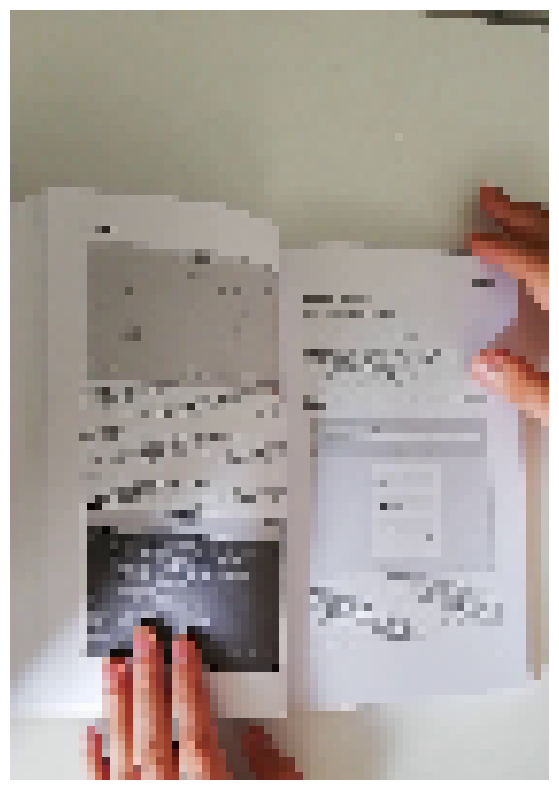

In [31]:
# visualizing the image
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.subplot(1,1,1)
plt.imshow(X_train[1], cmap="gray")
plt.axis('off')
plt.show()


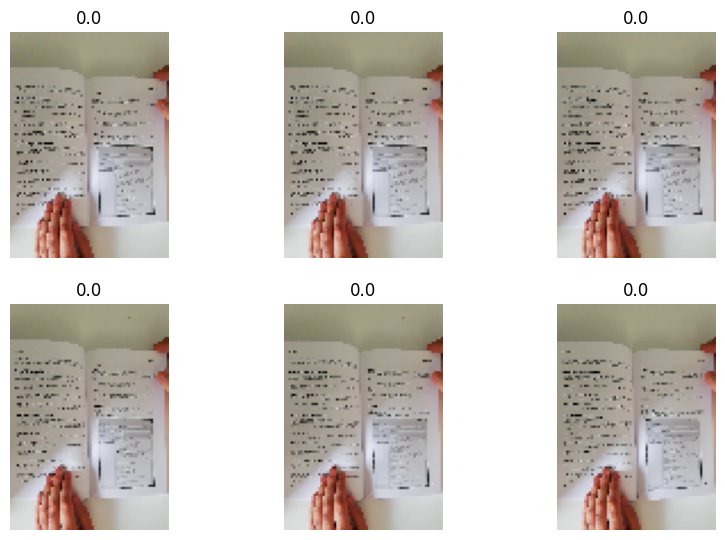

In [32]:
plt.figure(figsize=(10, 10))
for i in range(6):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(X[i])
  plt.title(y[i])
  plt.axis("off")

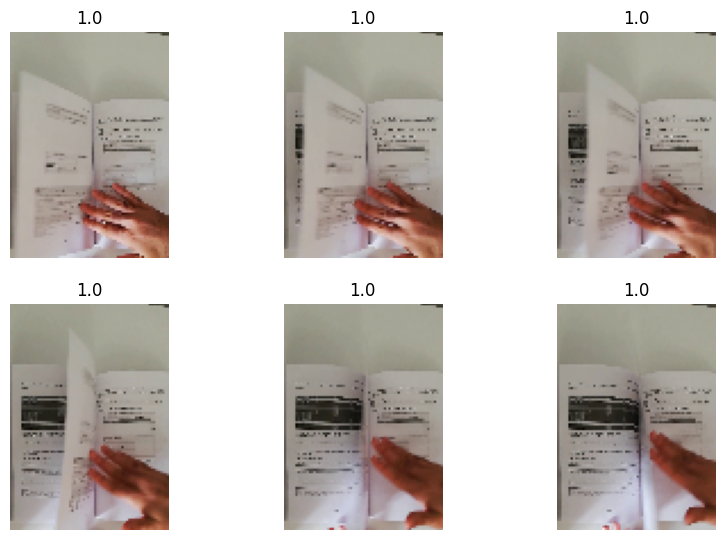

In [33]:
plt.figure(figsize=(10, 10))
for i in range(-6, 0):
  ax = plt.subplot(3, 3, 0 - i)
  plt.imshow(X[i])
  plt.title(y[i])
  plt.axis("off")

In [34]:
model = Sequential()
model.add(Conv2D(32, (2, 2), activation = ReLU(), padding = 'same', input_shape=(100, 70,3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation=ReLU()))
model.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.001)

model.compile(loss=losses.binary_crossentropy, optimizer=adam, metrics=['accuracy'])

In [35]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 70, 32)       416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 35, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 56000)             0         
                                                                 
 dense (Dense)               (None, 128)               7168128   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 7,168,673
Trainable params: 7,168,673
Non-trainable params: 0
______________________________________________

In [36]:
history_model = model.fit(X_train, y_train, validation_data=(X_val, y_val), shuffle=True, epochs=12, batch_size=64, verbose=1)


Epoch 1/12
30/30 [==============================] - 6s 163ms/step - loss: 1.5367 - accuracy: 0.5029 - val_loss: 0.6961 - val_accuracy: 0.4697
Epoch 2/12
30/30 [==============================] - 5s 157ms/step - loss: 0.6363 - accuracy: 0.6513 - val_loss: 0.6036 - val_accuracy: 0.6388
Epoch 3/12
30/30 [==============================] - 5s 164ms/step - loss: 0.5224 - accuracy: 0.7465 - val_loss: 0.4504 - val_accuracy: 0.8685
Epoch 4/12
30/30 [==============================] - 5s 160ms/step - loss: 0.4158 - accuracy: 0.8667 - val_loss: 0.3524 - val_accuracy: 0.9353
Epoch 5/12
30/30 [==============================] - 5s 165ms/step - loss: 0.3265 - accuracy: 0.9096 - val_loss: 0.2828 - val_accuracy: 0.9374
Epoch 6/12
30/30 [==============================] - 5s 163ms/step - loss: 0.2707 - accuracy: 0.9174 - val_loss: 0.2211 - val_accuracy: 0.9708
Epoch 7/12
30/30 [==============================] - 5s 164ms/step - loss: 0.2257 - accuracy: 0.9326 - val_loss: 0.1988 - val_accuracy: 0.9395
Epoch 

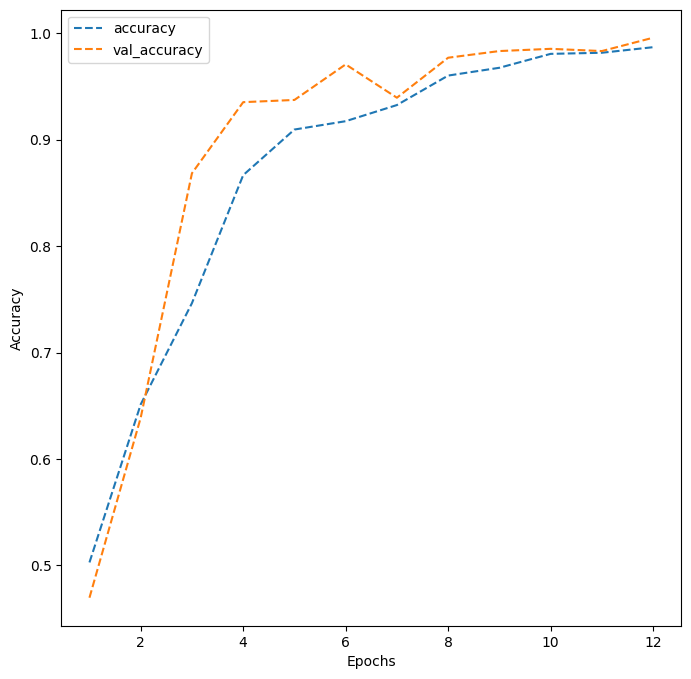

In [37]:
# plotting the accuracies

dict_hist = history_model.history
list_ep = [i for i in range(1,13)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [38]:
test_pred2 = model.predict(X_test, verbose=1)


# Choose a threshold of 0.5
threshold = 0.5

# Convert probabilities to predicted labels
test_pred_labels2 = np.where(test_pred2 >= threshold, 1, 0)
#test_pred_labels1

19/19 [==============================] - 0s 22ms/step


              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       307
         1.0       0.97      0.99      0.98       290

    accuracy                           0.98       597
   macro avg       0.98      0.98      0.98       597
weighted avg       0.98      0.98      0.98       597



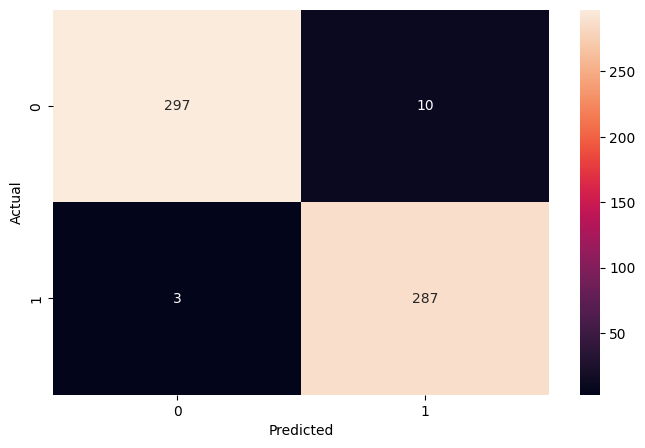

In [39]:

#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred_labels2))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred_labels2)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [193]:
model.save('model_Parameters.h5')

In [78]:
tf.keras.backend.clear_session()

Use Cv2 to import images 
* Resize images to reduce computation
* Reverse chanels order to be RGB instade of BGR
* Extract the Area of Intrest and remove noise (hands)


In [6]:
def read_images(folder):
    y,h,x,w = 0,100,0,70
    images = []
    for filename in tqdm(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) ##convert images from BGR to RGB
        if img is not None:
            img = cv2.resize(img, dsize = (70,140), interpolation=cv2.INTER_CUBIC)
            img = img[y:y+h, x:x+w] ##extract Aria of Intrest,
            img = img/255
            images.append(img)
            
    return images

In [7]:
train_notflip = read_images("../images/training/0")
train_flip = read_images("../images/training/1")

100%|██████████| 1162/1162 [00:37<00:00, 30.61it/s]


In [8]:
X_noflip = np.array(train_notflip)
X_flip = np.array(train_flip)

y_noflip = np.zeros(X_noflip.shape[0])
y_flip = np.ones(X_flip.shape[0])

X = np.concatenate((X_noflip,X_flip ))
y = np.concatenate((y_noflip, y_flip))

X.shape, y.shape

((2392, 100, 70, 3), (2392,))

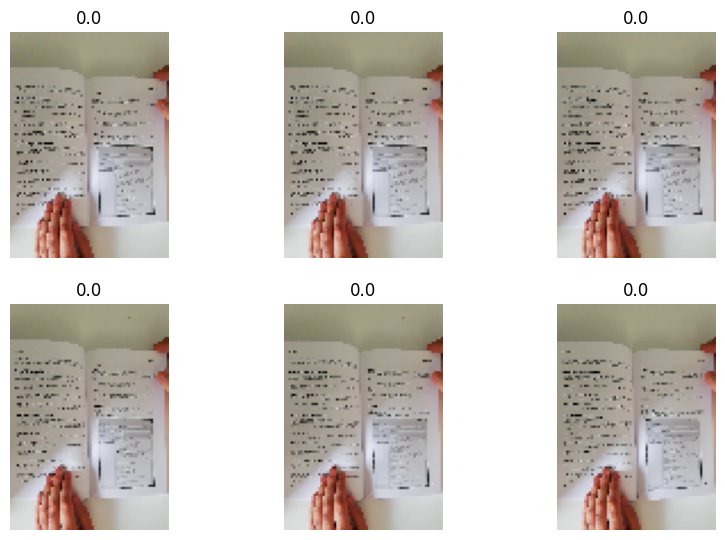

In [9]:
plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X[i])
    plt.title(y[i])
    plt.axis("off")

In [10]:
test_notflip = read_images("../images/testing/0")
test_flip = read_images("../images/testing/1")

100%|██████████| 290/290 [00:09<00:00, 30.78it/s]


In [11]:
X_test_noflip = np.array(test_notflip)
X_test_flip = np.array(test_flip)

y_test_noflip = np.zeros(X_test_noflip.shape[0])
y_test_flip = np.ones(X_test_flip.shape[0])


X_test = np.concatenate((X_test_noflip,X_test_flip ))
y_test = np.concatenate((y_test_noflip, y_test_flip))

X_test.shape, y_test.shape

((597, 100, 70, 3), (597,))

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y , test_size = 0.2, random_state = seed_value)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1913, 100, 70, 3), (479, 100, 70, 3), (1913,), (479,))

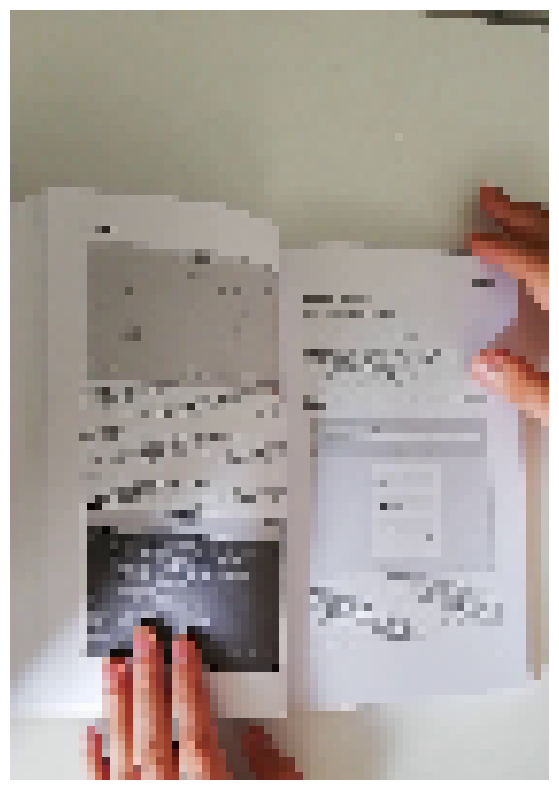

In [13]:
# visualizing the image
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.subplot(1,1,1)
plt.imshow(X_train[1])
plt.axis('off')
plt.show()


In [51]:
model = Sequential()
model.add(Conv2D(32, (2, 2), activation = ReLU(), padding = 'same', input_shape=(100, 70,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation=ReLU()))
model.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.001)

model.compile(loss=losses.binary_crossentropy, optimizer=adam, metrics=['accuracy'])

In [52]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 70, 32)       416       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 50, 35, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 56000)             0         
                                                                 
 dense_8 (Dense)             (None, 64)                3584064   
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,584,545
Trainable params: 3,584,545
Non-trainable params: 0
____________________________________________

In [53]:
history_model = model.fit(X_train, y_train, validation_data=(X_val, y_val), shuffle=True, epochs=12, batch_size=64, verbose=1)


Epoch 1/12
30/30 [==============================] - 5s 148ms/step - loss: 1.1171 - accuracy: 0.5536 - val_loss: 0.5092 - val_accuracy: 0.7808
Epoch 2/12
30/30 [==============================] - 5s 151ms/step - loss: 0.4235 - accuracy: 0.8212 - val_loss: 0.2942 - val_accuracy: 0.9415
Epoch 3/12
30/30 [==============================] - 4s 143ms/step - loss: 0.2298 - accuracy: 0.9430 - val_loss: 0.1957 - val_accuracy: 0.9395
Epoch 4/12
30/30 [==============================] - 4s 128ms/step - loss: 0.1206 - accuracy: 0.9812 - val_loss: 0.1281 - val_accuracy: 0.9687
Epoch 5/12
30/30 [==============================] - 4s 127ms/step - loss: 0.0823 - accuracy: 0.9875 - val_loss: 0.0807 - val_accuracy: 0.9875
Epoch 6/12
30/30 [==============================] - 4s 131ms/step - loss: 0.0603 - accuracy: 0.9916 - val_loss: 0.0943 - val_accuracy: 0.9687
Epoch 7/12
30/30 [==============================] - 4s 138ms/step - loss: 0.0521 - accuracy: 0.9922 - val_loss: 0.0540 - val_accuracy: 0.9937
Epoch 

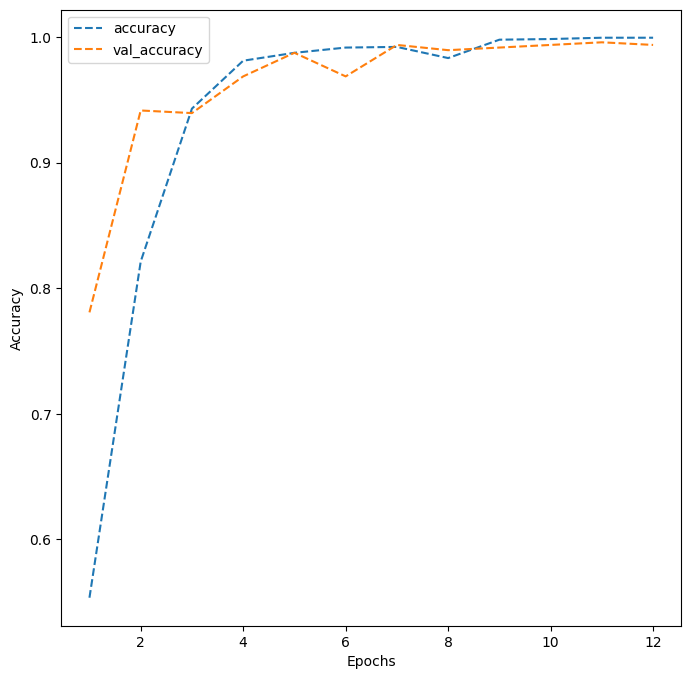

In [55]:
# plotting the accuracies

dict_hist = history_model.history
list_ep = [i for i in range(1,13)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [56]:
test_pred2 = model.predict(X_test, verbose=1)


# Choose a threshold of 0.5
threshold = 0.5

# Convert probabilities to predicted labels
test_pred_labels2 = np.where(test_pred2 >= threshold, 1, 0)
#test_pred_labels1

19/19 [==============================] - 0s 17ms/step


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       307
         1.0       1.00      0.98      0.99       290

    accuracy                           0.99       597
   macro avg       0.99      0.99      0.99       597
weighted avg       0.99      0.99      0.99       597



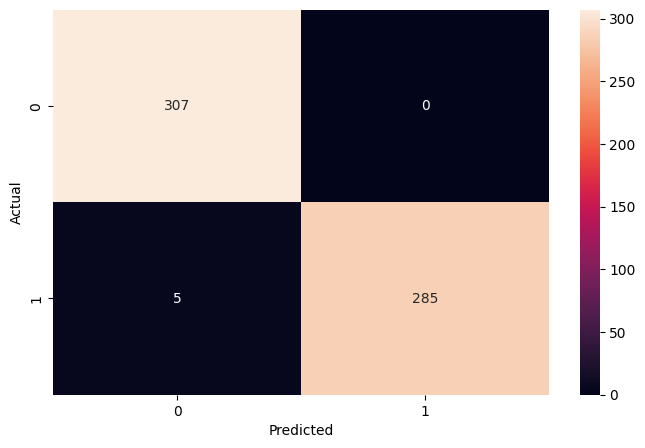

In [60]:

#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred_labels2))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred_labels2)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [61]:
model.save("model_CNN.h5")

In [62]:
!dir model_CNN.h5

 Volume in drive C has no label.
 Volume Serial Number is 8041-6784

 Directory of C:\Users\abedq\Desktop\Apziva\Apziva\p4\Notebook

02/27/2023  05:34 PM        43,048,256 model_CNN.h5
               1 File(s)     43,048,256 bytes
               0 Dir(s)  193,844,006,912 bytes free
